In [34]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import SolveTriangular

# Esercizio 1

dati = loadmat('test_II.mat')
A=dati["A"] 
A=A.astype(float)
print(A.shape) # di grandi dimensioni
b=dati["b"]
b=b.astype(float)
print(A)
x0 = np.zeros_like(b)

print((np.count_nonzero(A)/(A.shape[0]*A.shape[1]))*100, "% valori non uguali a zero") # è sparsa
val = np.sum(A[1,:])
print(val)
print(A[0][0] > val) # la diagonale è strettamente dominante
print(A.all() == A.T.all()) # è simmetrica
autoval = np.linalg.eigvals(A)
print(autoval.all() > 0) # è definita positiva

def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
    # inizializzare le variabili necessarie
    x = x0
    
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
    # utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap=A@p
        alpha = (r.T@r)/(p.T@Ap)
        x = x + alpha*p
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma= (r.T@r)/(rtr_old)
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =  -r + gamma*p
   
    
    return x,vet_r,vec_sol,it

def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A,-1)
    F=np.triu(A,+1)
    M=E+D
    N=-F
    T=np.linalg.inv(M)@N
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it < it_max and errore > toll:
        temp= np.linalg.inv(M)
        x= T@x0 + temp@b
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

itmax = 500
tol = 1e-8

xC,vet_rC,vec_sol,itC = conjugate_gradient(A,b,x0,itmax,tol)
print("iterazioni coniugato", itC)
vel_con = ((np.sqrt(np.linalg.cond(A))-1)/(np.sqrt(np.linalg.cond(A))+1))*vet_rC[0]
print("velocità del gradiente coniugato", vel_con)
x,it,er_vet = gauss_seidel(A,b,x0,tol,itmax) # il raggio spettrale ci determina la velocità di convergenza dei metodi iterativi
print("iterazioni gauss_seidel",it)


(400, 400)
[[ 8. -1.  0. ...  0.  0.  0.]
 [-1.  8. -1. ...  0.  0.  0.]
 [ 0. -1.  8. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  8. -1.  0.]
 [ 0.  0.  0. ... -1.  8. -1.]
 [ 0.  0.  0. ...  0. -1.  8.]]
1.2 % valori non uguali a zero
5.0
True
True
True
iterazioni coniugato 13
velocità del gradiente coniugato 0.2645027835196776
raggio spettrale Gauss-Seidel  0.24444660072329483
iterazioni gauss_seidel 17


4.663457775986457


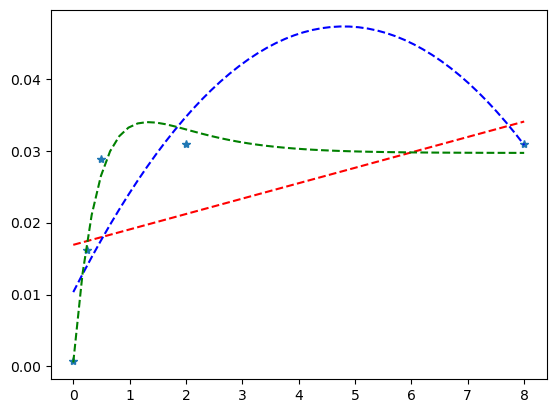

In [73]:
# Esercizio 2
from scipy.linalg import cholesky

x = np.array([0.0004,0.2507,0.5008,2.0007,8.0013])
y = np.array([0.0007,0.0162,0.0288,0.0309,0.0310])

n=1  #grado del polinomio di regressione
n1=n+1  # gradi di libertà
A = np.vander(x, increasing=True)[:,:n1]

print(np.linalg.cond(A))

def eqnorm(A,b):
#Risolve un sistema sovradeterminato con il metodo delle equazioni normali
    G= A.T@A
     
    f= A.T@b
    # ATTENZIONE lower
    # bool, optional
    # Whether to compute the upper- or lower-triangular Cholesky factorization. Default is upper-triangular.
    L= cholesky(G, lower=True)
    U=L.T
    
    z, flag= SolveTriangular.Lsolve(L,f)
    x, flag= SolveTriangular.Usolve(U, z)
    
    return x

#print(np.flip(eqnorm(A,y)))

coeff = np.flip(eqnorm(A,y))
pol = np.polyval(coeff, x)

plt.plot(x,pol,'r--',x,y,'*')

n=2  #grado del polinomio di regressione
n1=n+1  # gradi di libertà
A2 = np.vander(x, increasing=True)[:,:n1]

coeff = np.flip(eqnorm(A2,y))
x2 = np.linspace(np.min(x),np.max(x),50)
pol = np.polyval(coeff, x2)

plt.plot(x2,pol,'b--')

A3 = np.ones((len(x),3))
A3[:,1] = np.exp(-x)
A3[:,2] = np.exp(-2*x)
coeff = eqnorm(A3,y)

f = lambda x : coeff[0] +coeff[1]*np.exp(-x) + coeff[2]*np.exp(-2*x)

y3 = f(x2)

plt.plot(x2,y3,'g--')
plt.show()
